In [10]:
import os
import cv2
import pandas
from matplotlib import style
import seaborn as sns
import itertools
import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,roc_curve
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,Adagrad,RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow
import tensorflow as tf
import fnmatch
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten,Dropout,BatchNormalization

In [12]:
#from google.colab import drive
#drive.mount('C:/Users/Ahmed Wanas/Downloads/classes/binary_class')

In [13]:
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [14]:
print(os.listdir('C:/Users/Ahmed Wanas/Downloads/classes/binary_class'))

['Adriana Lima', 'Alex Lawther', 'Bill Gates', 'Rami Malik', 'Rihanna']


In [15]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [16]:
X=[]
Z=[]

ADRIANA_LIMA='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Adriana Lima'
ALEX_LAWTHER='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Alex Lawther'
BILL_GATES='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Bill Gates'
RIHANNA='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Rihanna'
RAMI_MALEK='C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Rami Malik'


In [17]:
len(os.listdir(ADRIANA_LIMA))




213

In [18]:
len(os.listdir(ALEX_LAWTHER))

152

In [19]:
len(os.listdir(BILL_GATES))

122

In [20]:
len(os.listdir(RIHANNA))

133

In [21]:
def assign_label(img,name):
    return name
IMG_SIZE=100

In [22]:
def make_train_data(name,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img,'*jpg'):
            label=assign_label(img,name)
            path=os.path.join(DIR,img)
            img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))

In [23]:
make_train_data('Adriana Lima',ADRIANA_LIMA)
print(len(X))



100%|██████████| 213/213 [00:03<00:00, 53.85it/s]

213


In [24]:
make_train_data('Alex Lawther',ALEX_LAWTHER)
print(len(X))

100%|██████████| 152/152 [00:01<00:00, 88.29it/s]

365


In [25]:
make_train_data('Bill Gates',BILL_GATES)
print(len(X))

100%|██████████| 122/122 [00:01<00:00, 62.06it/s]

487


In [26]:
make_train_data('RIHANNA',RIHANNA)
print(len(X))

100%|██████████| 133/133 [00:02<00:00, 59.02it/s]

620


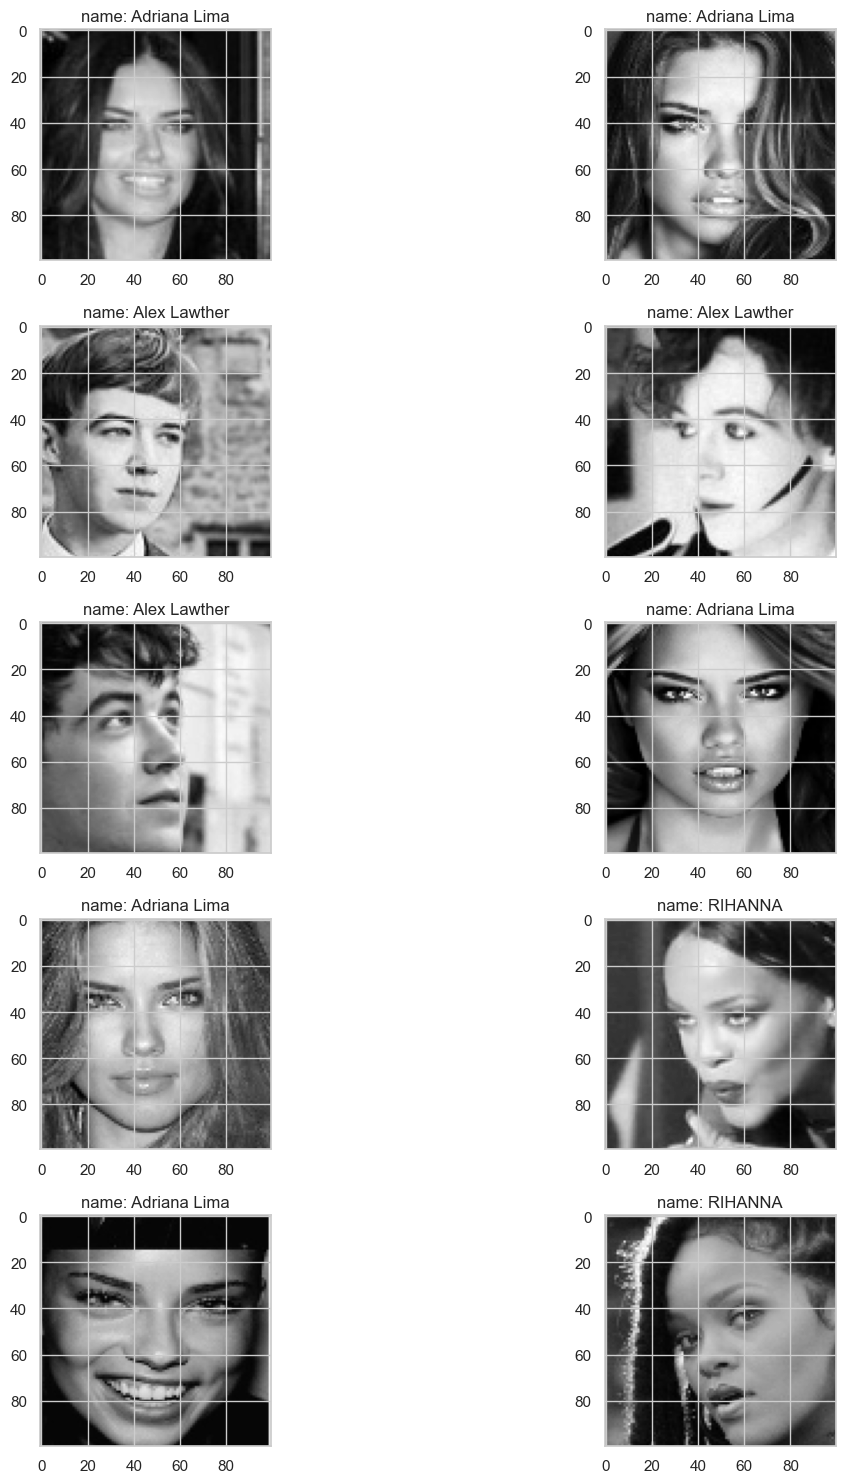

In [27]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l],cmap='gray')
        ax[i,j].set_title('name: '+Z[l])
plt.tight_layout()        
    

In [28]:
ax

array([[<AxesSubplot: title={'center': 'name: Adriana Lima'}>,
        <AxesSubplot: title={'center': 'name: Adriana Lima'}>],
       [<AxesSubplot: title={'center': 'name: Alex Lawther'}>,
        <AxesSubplot: title={'center': 'name: Alex Lawther'}>],
       [<AxesSubplot: title={'center': 'name: Alex Lawther'}>,
        <AxesSubplot: title={'center': 'name: Adriana Lima'}>],
       [<AxesSubplot: title={'center': 'name: Adriana Lima'}>,
        <AxesSubplot: title={'center': 'name: RIHANNA'}>],
       [<AxesSubplot: title={'center': 'name: Adriana Lima'}>,
        <AxesSubplot: title={'center': 'name: RIHANNA'}>]], dtype=object)

In [29]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255.0



In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [31]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 

In [32]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=( 100, 100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(.5))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [33]:
batch_size=128
epochs=1
from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=.1)



In [34]:
datagen=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                          featurewise_std_normalization=False,
                          samplewise_std_normalization=False,
                          zca_whitening=False,
                          rotation_range=10,
                          zoom_range=.1,
                          width_shift_range=.2,
                          height_shift_range=.2,
                          horizontal_flip=True,
                          vertical_flip=False)

datagen.fit(x_train)

In [35]:
model.compile(optimizer=Adam(lr=.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size)
                    ,epochs=30
                    ,validation_data=(x_test,y_test),
                    verbose=1
                   )


Epoch 1/30
4/4 [==============================] - 8s 1s/step - loss: 1.5253 - accuracy: 0.2882 - val_loss: 1.4147 - val_accuracy: 0.1613
Epoch 2/30
4/4 [==============================] - 3s 914ms/step - loss: 1.4330 - accuracy: 0.2710 - val_loss: 1.3870 - val_accuracy: 0.4968
Epoch 3/30
4/4 [==============================] - 4s 813ms/step - loss: 1.3874 - accuracy: 0.3763 - val_loss: 1.3140 - val_accuracy: 0.3548
Epoch 4/30
4/4 [==============================] - 3s 758ms/step - loss: 1.3495 - accuracy: 0.3505 - val_loss: 1.2888 - val_accuracy: 0.4000
Epoch 5/30
4/4 [==============================] - 3s 678ms/step - loss: 1.3147 - accuracy: 0.4043 - val_loss: 1.1786 - val_accuracy: 0.5226
Epoch 6/30
4/4 [==============================] - 3s 845ms/step - loss: 1.2511 - accuracy: 0.4409 - val_loss: 1.1591 - val_accuracy: 0.4968
Epoch 7/30
4/4 [==============================] - 4s 820ms/step - loss: 1.1736 - accuracy: 0.4796 - val_loss: 1.0888 - val_accuracy: 0.5355
Epoch 8/30
4/4 [=======

In [ ]:
model.evaluate(x_test,y_test,batch_size=128)

In [ ]:
model.predict(x_test)

In [ ]:
def prepare(filepath):
    IMG_SIZE=100
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    return new_img
    
    

In [ ]:
prediction=model.predict(np.array([prepare("C:/Users/Ahmed Wanas/Downloads/classes/binary_class/Rami Malik/Rami Malek0_3720.jpg")]))

In [ ]:
prediction

In [ ]:
prediction[0][4]

In [ ]:
if prediction[0][0]==1:
    print("this image for: Adriana Lima")
if prediction[0][1]==1:
    print("this image for: Alex Lawther")
if prediction[0][2]==1:
    print("this image for: Bill Gates")
if prediction[0][3]==1:
    print("this image for: Natalie Portman ")
if prediction[0][4]==1:
    print("this image for: Rami Malek")    
